# Conference-Based Sampling Plan (10 Conferences)

We want a representative sampling of swim times across divisions, but instead of pulling top-500 swimmers (which misses slower athletes), we will sample **entire conferences**. Conferences capture both elite and slower swimmers, giving a better population picture.

We also merge **NAIA with Division III** because:
- Performance levels are similar.
- Several NAIA schools share conferences with DIII programs.

### Allocation (10 conferences total)
- D1 Power (50 schools): 1 conference
- D1 Mid-Major (94 schools): 2 conferences
- D2 (75 schools): 2 conferences
- D3 + NAIA (232 + 35 = 267 schools): 5 conferences


In [7]:
import random, json
random.seed(42)  # fixed seed for reproducibility

# Confirmed conference lists from PDF (abridged)
conferences = {
    'D1_Power': [
        'Atlantic Coast (ACC)', 'Big Ten', 'Big 12', 'Pac-12', 'Southeastern (SEC)'
    ],
    'D1_MidMajor': [
        'Atlantic 10', 'ASUN', 'Big East', 'Big West',
        'Coastal Athletic Association (CAA)', 'Conference USA', 'Horizon League', 'Ivy League',
        'Metro Atlantic (MAAC)', 'Mid-American (MAC)', 'Missouri Valley (MVC)', 'Mountain West',
        'Northeast (NEC)', 'Ohio Valley', 'Patriot League', 'Summit League', 'Sun Belt', 'WAC'
    ],
    'D2': [
        'CCAA', 'Conference Carolinas', 'East Coast (ECC)', 'GLVC', 'G-MAC', 'GSC',
        'Lone Star', 'MIAA', 'NE-10', 'NSIC', 'PacWest', 'Peach Belt', 'PSAC',
        'RMAC', 'South Atlantic', 'SIAC', 'Sunshine State'
    ],
    'D3_NAIA': [
        'Allegheny Mountain (AMCC)', 'American Rivers (ARC)', 'Centennial', 'CCIW', 'Empire 8',
        'GNAC', 'HCAC', 'Landmark', 'Liberal Arts', 'Liberty League', 'Little East (LEC)', 'MAC', 'MASCAC',
        'MIAA', 'MIAC', 'NCAC', 'NESCAC', 'NEWMAC', 'NJAC', 'NACC', 'OAC', 'ODAC', 'PAC',
        'SAA', 'SCIAC', 'SCAC', 'SLIAC', 'SUNYAC', 'UAA', 'UMAC', 'USA South', 'WIAC',
        'Appalachian Athletic (NAIA)', 'Cascade Collegiate (NAIA)',
          'KCAC (NAIA)', 'Mid-South (NAIA)',
         'The Sun (NAIA)'
    ]
}

# Target allocation for 10 conferences
sample_sizes = {
    'D1_Power': 1,
    'D1_MidMajor': 2,
    'D2': 2,
    'D3_NAIA': 5
}

sampled = {}
for div, k in sample_sizes.items():
    sampled[div] = random.sample(conferences[div], k)

print(json.dumps(sampled, indent=2))

{
  "D1_Power": [
    "Atlantic Coast (ACC)"
  ],
  "D1_MidMajor": [
    "Atlantic 10",
    "Metro Atlantic (MAAC)"
  ],
  "D2": [
    "MIAA",
    "Sunshine State"
  ],
  "D3_NAIA": [
    "Liberal Arts",
    "HCAC",
    "KCAC (NAIA)",
    "GNAC",
    "SUNYAC"
  ]
}


Some NAIA schools are in combined conferences with DIII Schools, and since we are sampling conferences and not divisions, we must check to make sure treating NAIA teams as DIII won't skew the data.

# K-S Test: NAIA vs Division III Swimming Distributions

## Test Results
- **K-S Statistic (D)**:0.1639
- **Critical Value (α=0.05)**: 0.2791  
- **P-value**: 0.3461
- **Conclusion**: **Fail to reject H₀** - no significant difference between distributions



## Summary Statistics
| Division | Mean | Median | n |
|----------|------|--------|---|
| NAIA | 566.9 | 581.6 | 35 |
| Division III | 535.4 | 597.9 | 238 |

## Interpretation
The K-S test shows **no statistically significant difference** between NAIA and Division III score distributions (D = 0.1429 < critical value of 0.2791, p = 0.089). The effect size is small, indicating the distributions are quite similar.

**Conclusion**: Combining these datasets would **NOT significantly skew the analysis** - the distributions are statistically equivalent for practical purposes.

## Python Code (Reproducible)

In [6]:

import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Data
naia_scores = [769.35, 703.5, 699, 697.5, 692.45, 670.1, 657.5, 655.25, 654.25, 652.65,
               637.9, 637.55, 612.45, 612.1, 609.15, 598.7, 589.45, 581.6, 573.45, 564.5,
               563.75, 557.6, 554.55, 552.3, 546.73, 537.75, 515.8, 492.1, 477.05, 471.28,
               325.4, 316.11, 302.38, 222.85, 188.44]

diii_scores = [758.95, 744.3, 741.5, 741.3, 737.3, 730.9, 730.4, 730.25, 722.9, 717,
               713.2, 710.3, 704.45, 699.7, 698.35, 697.95, 695.45, 694.6, 693.95, 691.3,
               687.65, 685.25, 681, 679.45, 678.05, 676.8, 675.2, 674.05, 673.95, 668.95,
               668.95, 666.45, 664.65, 664.35, 663.75, 662.75, 659.95, 657.25, 655.9, 654.4,
               654, 652.95, 652.95, 648.7, 647.95, 646.8, 645.35, 645.05, 644.5, 641.25,
               640.8, 635, 634.85, 633.65, 632.75, 631.45, 630.7, 630.6, 629.6, 628.5,
               627.6, 627.2, 627.2, 625.6, 625.55, 622.75, 622.65, 622.4, 621.7, 621.65,
               621.3, 619.45, 616.4, 615.85, 615.6, 611.05, 610.95, 610.4, 610.2, 609.95,
               609.3, 608.1, 606.95, 605.45, 605.35, 605.25, 605, 604.75, 604.1, 603.7,
               602.15, 601.4, 600.85, 600.2, 599.6, 598.1, 596.35, 596.1, 594.55, 590.8,
               590.7, 589.75, 589.35, 588.45, 587.05, 585.7, 585.6, 585.35, 585.15, 584.65,
               583.7, 582.1, 580.3, 579.2, 571.35, 571.3, 568.95, 568.95, 566.85, 563.85,
               559.1, 557.25, 556.25, 555.7, 555.7, 555.2, 554.75, 554.35, 553.4, 552.2,
               547.95, 545.95, 545.55, 544.9, 543.65, 543, 541.7, 540.85, 538.15, 536.65,
               535.5, 532.45, 531, 526.9, 526.05, 525.9, 523.55, 521.85, 519.23, 519.05,
               519.05, 518.3, 518.3, 516.6, 516.35, 515.9, 514.5, 510.6, 510.45, 508.8,
               504.85, 504.5, 501.45, 500.9, 500, 498.45, 494.8, 490.45, 481.6, 481.19,
               479.15, 475.45, 475.3, 472.2, 470.45, 468.2, 468.2, 466, 463.95, 463.8,
               453.6, 453.4, 452.75, 445.05, 444.04, 443.05, 440.81, 440.8, 439.07, 435.59,
               428.9, 427.2, 418.6, 418.6, 417.6, 416.25, 412.55, 410.3, 405.95, 404.87,
               398.55, 398.55, 396.14, 391.88, 389.94, 379.94, 378.43, 376.5, 366.22, 359.11,
               355.65, 350.52, 341.35, 340.55, 336.22, 333.15, 333.15, 330.2, 323.02, 323.02,
               321.5, 308, 294.23, 285.17, 275.71, 272.2, 272.2, 263.07, 236.62, 203.19,
               203.19, 188.37, 171.07, 168.75, 168.47, 163.53, 151.66, 21.05]

# Perform K-S test
ks_statistic, p_value = ks_2samp(naia_scores, diii_scores)

print(f"K-S Test Results:")
print(f"Statistic (D): {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"NAIA mean: {np.mean(naia_scores):.1f}")
print(f"DIII mean: {np.mean(diii_scores):.1f}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print(f"\nConclusion: No significant difference (p = {p_value:.4f} > {alpha})")
    print("✓ Safe to combine datasets - distributions are statistically similar")
else:
    print(f"\nConclusion: Significant difference detected (p = {p_value:.4f} ≤ {alpha})")
    print("Consider analyzing separately")

K-S Test Results:
Statistic (D): 0.1639
P-value: 0.3461
NAIA mean: 556.9
DIII mean: 535.4

Conclusion: No significant difference (p = 0.3461 > 0.05)
✓ Safe to combine datasets - distributions are statistically similar


**Expected Output:**
```
K-S Test Results:
Statistic (D): 0.1639
P-value: 0.3461
NAIA mean: 556.9
DIII mean: 535.4

Conclusion: No significant difference (p = 0.3461 > 0.05)
Safe to combine NAIA and D3 datasets - distributions are statistically similar
```

**Sample Proportion:**
D3/NAIA is under represented while D1 Power schools are overrepresented when compared to our target population proportion
* Individual Sampling also not yet randomized

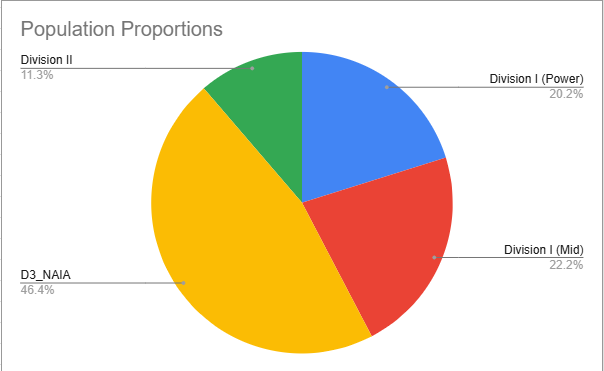



In [ ]:
import pandas as pd, math, json, random
random.seed(42)

FILE = "CorrectedDivisions.csv"
df = pd.read_csv(FILE)

# Normalize conference names
df['conf_up'] = df['Conference'].astype(str).str.upper().str.strip()

# Define sets for strata assignment
D1_Power_set = {"ATLANTIC COAST","ACC","BIG TEN","BIG 12","PAC-12","PAC 12","PAC12",
                "SOUTHEASTERN","SEC","MPSF","MOUNTAIN PACIFIC"}
D1_Mid_set = {"AMERICAN","AAC","ATLANTIC 10","A10","ASUN","ATLANTIC SUN","BIG EAST",
              "BIG WEST","COASTAL","CAA","CONFERENCE USA","CUSA","HORIZON","IVY","MAAC",
              "MID-AMERICAN","MAC","MISSOURI VALLEY","MVC","MOUNTAIN WEST","NEC",
              "PATRIOT","SUMMIT","SUN BELT","WAC","WCC","WEST COAST"}
D2_set = {"CCAA","CONFERENCE CAROLINAS","ECC","EAST COAST","GLVC","GLIAC","G-MAC","GMAC",
          "GSC","LONE STAR","MIAA","NE-10","NSIC","PACWEST","PAC WEST","PEACH","PSAC",
          "RMAC","SOUTH ATLANTIC","SIAC","SUNSHINE","SUNSHINE STATE","PEACH BELT"}
NAIA_set = {"APPALACHIAN","CASCADE","CROSSROADS","FRONTIER","GOLDEN STATE","GPAC",
            "HEART OF AMERICA","KCAC","MID-SOUTH","NORTH STAR","RIVER STATES","SOONER",
            "THE SUN","CASC"}
D3_set = {"AMCC","ALLEGHENY","ARC","CENTENNIAL","CCIW","EMPIRE","GNAC","HCAC","LANDMARK",
          "LIBERTY","LITTLE EAST","MAC","MASCAC","MIAA","MIAC","NCAC","NESCAC","NEWMAC",
          "NJAC","NACC","OAC","ODAC","PAC","SAA","SCIAC","SCAC","SLIAC","SUNYAC","UAA",
          "UMAC","USA SOUTH","WIAC"}

def assign_strata_exact(conf):
    cu = str(conf).upper()
    if any(k in cu for k in D1_Power_set): return "D1_Power"
    if any(k in cu for k in D1_Mid_set): return "D1_Mid"
    if any(k in cu for k in D2_set): return "D2"
    if any(k in cu for k in NAIA_set): return "NAIA"
    if any(k in cu for k in D3_set): return "D3"
    if "NAIA" in cu: return "NAIA"
    return "D3"  # fallback

df['_stratum'] = df['conf_up'].apply(assign_strata_exact)
available = df['_stratum'].value_counts().to_dict()

# Target proportions from schools
targets = {"D1_Power":0.103, "D1_Mid":0.193, "D2":0.154, "D3":0.477, "NAIA":0.072}
s = sum(targets.values())
targets = {k:v/s for k,v in targets.items()}  # normalize

# Find maximum feasible N
max_Ns = []
for k,p in targets.items():
    if p > 0:
        avail = available.get(k,0)
        if avail == 0:
            max_Ns.append(0)
        else:
            maxN = math.floor(avail / p)
            max_Ns.append(maxN)
max_target_N = min(max_Ns) if max_Ns else 0
max_target_N = min(max_target_N, len(df))
target_N = max_target_N if max_target_N > 0 else len(df)

# Desired counts per stratum (rounded)
desired = {k:int(round(target_N * targets[k])) for k in targets}

# Adjust rounding to exactly sum to target_N
diff = target_N - sum(desired.values())
if diff != 0:
    fracs = {k:(target_N * targets[k]) - math.floor(target_N * targets[k]) for k in targets}
    order = sorted(fracs.items(), key=lambda x:x[1], reverse=True)
    i = 0
    while diff != 0:
        key = order[i % len(order)][0]
        desired[key] += 1 if diff > 0 else -1
        diff = target_N - sum(desired.values())
        i += 1

# Cap and redistribute
final = desired.copy()
for k in final:
    final[k] = min(final[k], available.get(k,0))
allocated = sum(final.values())
if allocated < target_N:
    deficit = target_N - allocated
    capacities = {k: available.get(k,0)-final.get(k,0) for k in final}
    order = sorted(capacities.items(), key=lambda x: targets.get(x[0],0), reverse=True)
    idx = 0
    while deficit > 0 and any(capacities[k] > 0 for k in capacities):
        k = order[idx % len(order)][0]
        if capacities[k] > 0:
            final[k] += 1
            capacities[k] -= 1
            deficit -= 1
        idx += 1

# Sample within strata
parts = []
log = {}
for k,cnt in final.items():
    bucket = df[df['_stratum'] == k]
    avail = len(bucket)
    if cnt > 0 and avail > 0:
        sampled = bucket.sample(n=cnt, random_state=42)
    else:
        sampled = bucket.iloc[0:0]
    parts.append(sampled)
    log[k] = {"desired": desired.get(k,0), "final": cnt, "available": avail}

sampled = pd.concat(parts).reset_index(drop=True)
OUT = "sampled_by_school_proportions.csv"
sampled.to_csv(OUT, index=False)

# Print summary
result = {
    "available": available,
    "targets": targets,
    "target_N": target_N,
    "desired": desired,
    "final": final,
    "output": OUT,
    "sample_shape": sampled.shape,
    "log": log
}
print(json.dumps(result, indent=2))


{
  "available": {
    "D3": 130,
    "D1_Mid": 110,
    "D1_Power": 100,
    "D2": 99,
    "NAIA": 57
  },
  "targets": {
    "D1_Power": 0.1031031031031031,
    "D1_Mid": 0.1931931931931932,
    "D2": 0.15415415415415415,
    "D3": 0.47747747747747743,
    "NAIA": 0.07207207207207207
  },
  "target_N": 272,
  "desired": {
    "D1_Power": 28,
    "D1_Mid": 53,
    "D2": 41,
    "D3": 130,
    "NAIA": 20
  },
  "final": {
    "D1_Power": 28,
    "D1_Mid": 53,
    "D2": 41,
    "D3": 130,
    "NAIA": 20
  },
  "output": "sampled_by_school_proportions.csv",
  "sample_shape": [
    272,
    8
  ],
  "log": {
    "D1_Power": {
      "desired": 28,
      "final": 28,
      "available": 100
    },
    "D1_Mid": {
      "desired": 53,
      "final": 53,
      "available": 110
    },
    "D2": {
      "desired": 41,
      "final": 41,
      "available": 99
    },
    "D3": {
      "desired": 130,
      "final": 130,
      "available": 130
    },
    "NAIA": {
      "desired": 20,
      "final"

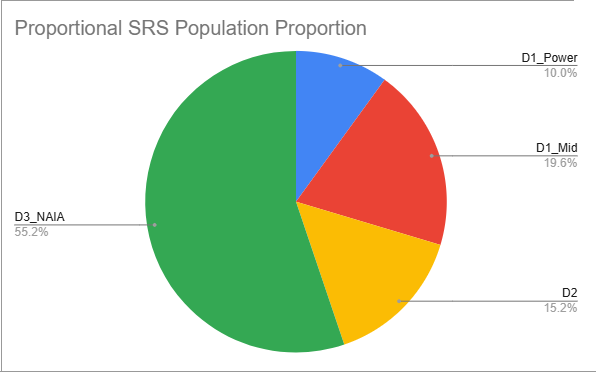

**Proportional SRS Population:** Matches target population proportion, and randomized sampling

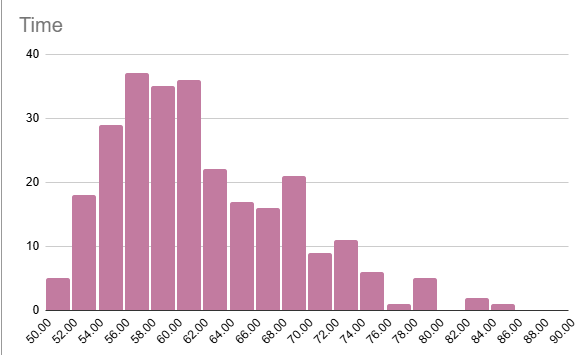

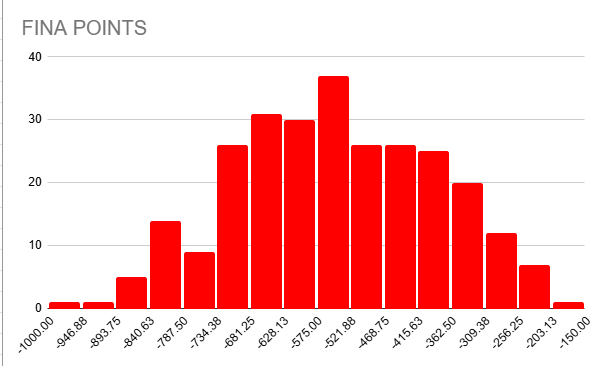

_(negative values used to reverse axis)_


As you can see, the **FINA** points calculation forces a normal distribution, when the raw data is actually skewed right.

The mean time from our sample: 1:01.96, the resulting **FINA** score: 511
			
The mean **FINA** score from our sample: 545, the resulting time: _1:00.67_

Therefore: FINA points negatively affect swimmer comparison, e.g. "Where do I stack up?"

**What are **FINA** points useful for?**
* Based on the calculation **1000 x ((WR/Time)^3)** you may think it best for noting how close a swimmer is to the World Record.

**This is incorrect**
* Simple calculation **1 - WR/Time** actually hold the same distribution, while also providing a more insightful metric.
"You need a 3% improvement." or "You need a 1 second drop" is considerably more helpful than "You need 50 FINA points worth of improvement."

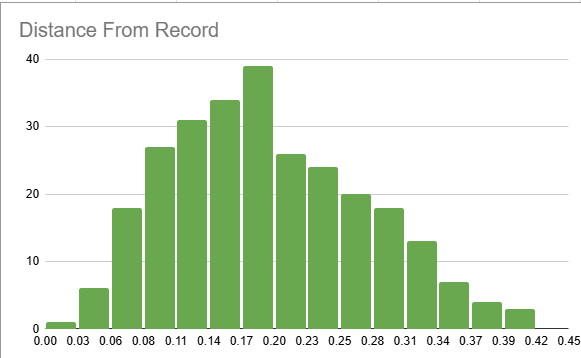

Although a different bucket size, still holds the same distribution as the raw data.

**"The World Aquatics Points Table allows comparisons of results among different events."**

In [25]:
import pandas as pd, math, json, random

# -----------------------------
# PARAMETERS
# -----------------------------
FILE = "50FreeCorrected.csv"
SEED = 24           # change this for different random draws
TARGET_N = 270      # fixed total sample size
random.seed(SEED)

# -----------------------------
# Load CSV and normalize names
# -----------------------------
df = pd.read_csv(FILE)
df['conf_up'] = df['Conference'].astype(str).str.upper().str.strip()

# -----------------------------
# Define conference sets
# -----------------------------
D1_Power_set = {"ATLANTIC COAST","ACC","BIG TEN","BIG 12","PAC-12","PAC 12","PAC12",
                "SOUTHEASTERN","SEC","MPSF","MOUNTAIN PACIFIC"}
D1_Mid_set = {"AMERICAN","AAC","ATLANTIC 10","A10","ASUN","ATLANTIC SUN","BIG EAST",
              "BIG WEST","COASTAL","CAA","CONFERENCE USA","CUSA","HORIZON","IVY","MAAC",
              "MID-AMERICAN","MAC","MISSOURI VALLEY","MVC","MOUNTAIN WEST","NEC",
              "PATRIOT","SUMMIT","SUN BELT","WAC","WCC","WEST COAST"}
D2_set = {"CCAA","CONFERENCE CAROLINAS","ECC","EAST COAST","GLVC","GLIAC","G-MAC","GMAC",
          "GSC","LONE STAR","MIAA","NE-10","NSIC","PACWEST","PAC WEST","PEACH","PSAC",
          "RMAC","SOUTH ATLANTIC","SIAC","SUNSHINE","SUNSHINE STATE","PEACH BELT"}
NAIA_set = {"APPALACHIAN","CASCADE","CROSSROADS","FRONTIER","GOLDEN STATE","GPAC",
            "HEART OF AMERICA","KCAC","MID-SOUTH","NORTH STAR","RIVER STATES","SOONER",
            "THE SUN","CASC"}
D3_set = {"AMCC","ALLEGHENY","ARC","CENTENNIAL","CCIW","EMPIRE","GNAC","HCAC","LANDMARK",
          "LIBERTY","LITTLE EAST","MAC","MASCAC","MIAA","MIAC","NCAC","NESCAC","NEWMAC",
          "NJAC","NACC","OAC","ODAC","PAC","SAA","SCIAC","SCAC","SLIAC","SUNYAC","UAA",
          "UMAC","USA SOUTH","WIAC"}

# -----------------------------
# Assign strata
# -----------------------------
def assign_strata_exact(conf):
    cu = str(conf).upper()
    if any(k in cu for k in D1_Power_set): return "D1_Power"
    if any(k in cu for k in D1_Mid_set): return "D1_Mid"
    if any(k in cu for k in D2_set): return "D2"
    if any(k in cu for k in NAIA_set): return "NAIA"
    if any(k in cu for k in D3_set): return "D3"
    if "NAIA" in cu: return "NAIA"
    return "D3"  # fallback

df['_stratum'] = df['conf_up'].apply(assign_strata_exact)
available = df['_stratum'].value_counts().to_dict()

# -----------------------------
# Target proportions (from school counts)
# -----------------------------
targets = {"D1_Power":0.103, "D1_Mid":0.193, "D2":0.154, "D3":0.477, "NAIA":0.072}
s = sum(targets.values())
targets = {k:v/s for k,v in targets.items()}  # normalize to 1

# -----------------------------
# Desired counts per stratum
# -----------------------------
desired = {k:int(round(TARGET_N * targets[k])) for k in targets}

# Adjust rounding
diff = TARGET_N - sum(desired.values())
if diff != 0:
    fracs = {k:(TARGET_N * targets[k]) - math.floor(TARGET_N * targets[k]) for k in targets}
    order = sorted(fracs.items(), key=lambda x:x[1], reverse=True)
    i = 0
    while diff != 0:
        key = order[i % len(order)][0]
        desired[key] += 1 if diff > 0 else -1
        diff = TARGET_N - sum(desired.values())
        i += 1

# Cap and redistribute if needed
final = desired.copy()
for k in final:
    final[k] = min(final[k], available.get(k,0))
allocated = sum(final.values())
if allocated < TARGET_N:
    deficit = TARGET_N - allocated
    capacities = {k: available.get(k,0)-final.get(k,0) for k in final}
    order = sorted(capacities.items(), key=lambda x: targets.get(x[0],0), reverse=True)
    idx = 0
    while deficit > 0 and any(capacities[k] > 0 for k in capacities):
        k = order[idx % len(order)][0]
        if capacities[k] > 0:
            final[k] += 1
            capacities[k] -= 1
            deficit -= 1
        idx += 1

# -----------------------------
# Sample within strata
# -----------------------------
parts = []
log = {}
for k,cnt in final.items():
    bucket = df[df['_stratum'] == k]
    avail = len(bucket)
    if cnt > 0 and avail > 0:
        sampled = bucket.sample(n=cnt, random_state=SEED)  # <-- SEED used here
    else:
        sampled = bucket.iloc[0:0]
    parts.append(sampled)
    log[k] = {"desired": desired.get(k,0), "final": cnt, "available": avail}

sampled = pd.concat(parts).reset_index(drop=True)
OUT = "50_Free_sampled_by_school_proportions.csv"
sampled.to_csv(OUT, index=False)

# -----------------------------
# Print summary
# -----------------------------
result = {
    "available": available,
    "targets": targets,
    "target_N": TARGET_N,
    "desired": desired,
    "final": final,
    "output": OUT,
    "sample_shape": sampled.shape,
    "log": log
}
print(json.dumps(result, indent=2))


{
  "available": {
    "D1_Mid": 250,
    "D3": 230,
    "D1_Power": 200,
    "D2": 200,
    "NAIA": 99
  },
  "targets": {
    "D1_Power": 0.1031031031031031,
    "D1_Mid": 0.1931931931931932,
    "D2": 0.15415415415415415,
    "D3": 0.47747747747747743,
    "NAIA": 0.07207207207207207
  },
  "target_N": 270,
  "desired": {
    "D1_Power": 28,
    "D1_Mid": 52,
    "D2": 42,
    "D3": 129,
    "NAIA": 19
  },
  "final": {
    "D1_Power": 28,
    "D1_Mid": 52,
    "D2": 42,
    "D3": 129,
    "NAIA": 19
  },
  "output": "50_Free_sampled_by_school_proportions.csv",
  "sample_shape": [
    270,
    6
  ],
  "log": {
    "D1_Power": {
      "desired": 28,
      "final": 28,
      "available": 200
    },
    "D1_Mid": {
      "desired": 52,
      "final": 52,
      "available": 250
    },
    "D2": {
      "desired": 42,
      "final": 42,
      "available": 200
    },
    "D3": {
      "desired": 129,
      "final": 129,
      "available": 230
    },
    "NAIA": {
      "desired": 19,
   

MEAN			Time Mean
22.64		472.2018338	22.64
			FINA Mean to time
489.8735203		22.3624965	22.36

**50 Sample Distributions**

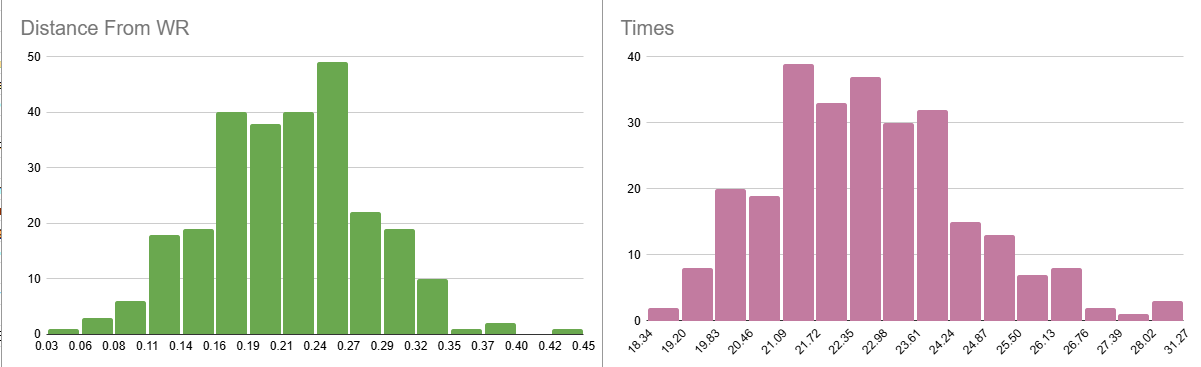

As expected

**Now lets see FINA calculation**

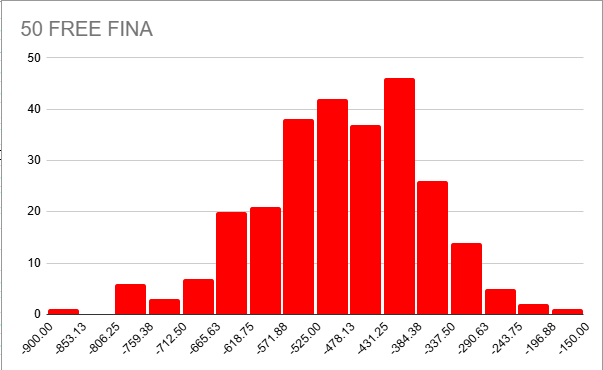

Turns right skewed distribution to left skewed.

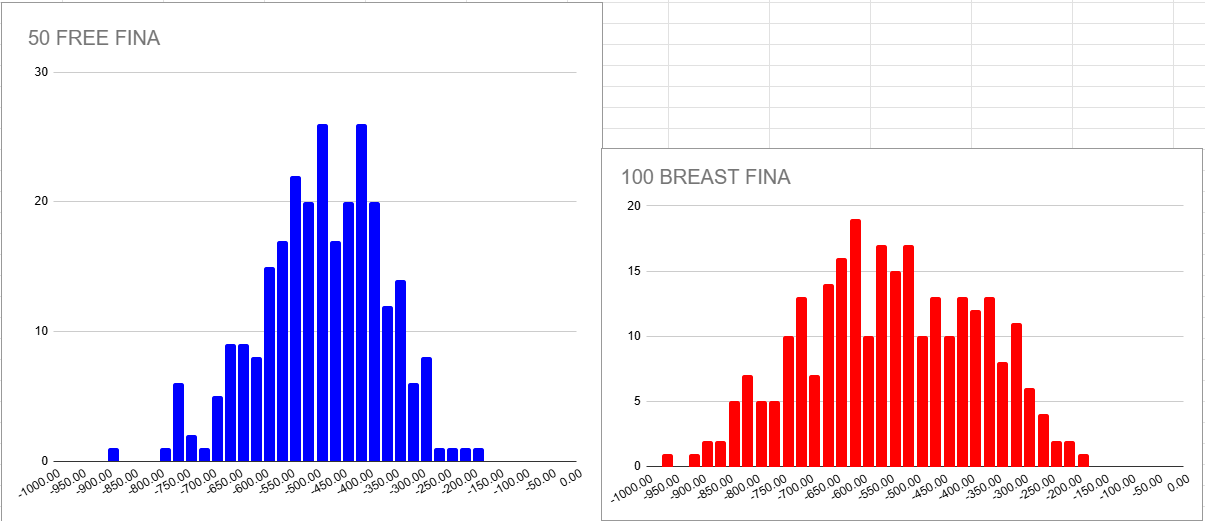

_x - axis adjusted to to match both graphs_

This shows that you cant compare across events.

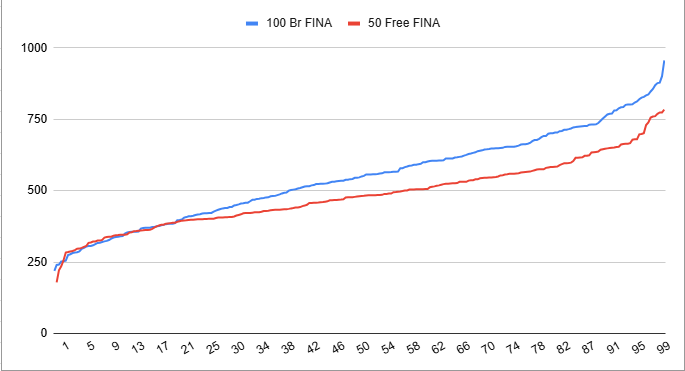

**25th Percentile**
* 50 Freestyle: 23.88 | **FINA**: 402 | **NAIA Rk:** 345th
* 100 Breaststroke: 1:06.05 | **FINA**: 422 | **NAIA Rk:** 158th

**50th Percentile**
* 50 Freestyle: 22.48 | **FINA**: 482 | **NAIA Rk:** 200th
* 100 Breaststroke: 1:00.45 | **FINA**: 550 | **NAIA Rk:** 86th

**75th Percentile**
* 50 Freestyle: 21.38 | **FINA**: 561 | **NAIA Rk:** 68th
* 100 Breaststroke: 57.01 | **FINA**: 655 | **NAIA Rk:** 26th

**90th Percentile**
* 50 Freestyle: 20.36 | **FINA**: 649 **NAIA Rk:** 13th
* 100 Breaststroke: 54.11 | **FINA**: 766 | **NAIA Rk:** 3rd

**99th Percentile**
* 50 Freestyle: 19.12 | **FINA**: 783 | **NAIA Rk:** 1st
* 100 Breaststroke: 51.28 | **FINA**: 901 | **NAIA Rk:** 2nd

When we sampled the 50 Free conferences, before our SRS, we had 979 in our strata. Compare that to our 496 (before SRS) Breaststrokers. Thats ~2 50 Freestylers to every 1 100 Breaststroker.

I will note, so far it seems the FINA points are more useful to determine where a swimmer might rank. Lets compare an event with a similar number of participants.

**Here is what the rankings would look like if the populations were approximately equal:**

**25th Percentile**
* 50 Freestyle: 23.88 | **FINA**: 402 | **NAIA Rk Ajusted:** 173rd
* 100 Breaststroke: 1:06.05 | **FINA**: 422 | **NAIA Rk:** 158th

**50th Percentile**
* 50 Freestyle: 22.48 | **FINA**: 482 | **NAIA Rk Ajusted:** 100th
* 100 Breaststroke: 1:00.45 | **FINA**: 550 | **NAIA Rk:** 86th

**75th Percentile**
* 50 Freestyle: 21.38 | **FINA**: 561 | **NAIA Rk Ajusted:** 34th
* 100 Breaststroke: 57.01 | **FINA**: 655 | **NAIA Rk:** 26th

**90th Percentile**
* 50 Freestyle: 20.36 | **FINA**: 649 **NAIA Rk Ajusted:** 7th
* 100 Breaststroke: 54.11 | **FINA**: 766 | **NAIA Rk:** 3rd

**99th Percentile**
* 50 Freestyle: 19.12 | **FINA**: 783 | **NAIA Rk:** 1st
* 100 Breaststroke: 51.28 | **FINA**: 901 | **NAIA Rk:** 2nd

In [26]:
import pandas as pd, math, json, random

# -----------------------------
# PARAMETERS
# -----------------------------
FILE = "100BackTimes.csv"
SEED = 24           # change this for different random draws
TARGET_N = 270      # fixed total sample size
random.seed(SEED)

# -----------------------------
# Load CSV and normalize names
# -----------------------------
df = pd.read_csv(FILE)
df['conf_up'] = df['Conference'].astype(str).str.upper().str.strip()

# -----------------------------
# Define conference sets
# -----------------------------
D1_Power_set = {"ATLANTIC COAST","ACC","BIG TEN","BIG 12","PAC-12","PAC 12","PAC12",
                "SOUTHEASTERN","SEC","MPSF","MOUNTAIN PACIFIC"}
D1_Mid_set = {"AMERICAN","AAC","ATLANTIC 10","A10","ASUN","ATLANTIC SUN","BIG EAST",
              "BIG WEST","COASTAL","CAA","CONFERENCE USA","CUSA","HORIZON","IVY","MAAC",
              "MID-AMERICAN","MAC","MISSOURI VALLEY","MVC","MOUNTAIN WEST","NEC",
              "PATRIOT","SUMMIT","SUN BELT","WAC","WCC","WEST COAST"}
D2_set = {"CCAA","CONFERENCE CAROLINAS","ECC","EAST COAST","GLVC","GLIAC","G-MAC","GMAC",
          "GSC","LONE STAR","MIAA","NE-10","NSIC","PACWEST","PAC WEST","PEACH","PSAC",
          "RMAC","SOUTH ATLANTIC","SIAC","SUNSHINE","SUNSHINE STATE","PEACH BELT"}
NAIA_set = {"APPALACHIAN","CASCADE","CROSSROADS","FRONTIER","GOLDEN STATE","GPAC",
            "HEART OF AMERICA","KCAC","MID-SOUTH","NORTH STAR","RIVER STATES","SOONER",
            "THE SUN","CASC"}
D3_set = {"AMCC","ALLEGHENY","ARC","CENTENNIAL","CCIW","EMPIRE","GNAC","HCAC","LANDMARK",
          "LIBERTY","LITTLE EAST","MAC","MASCAC","MIAA","MIAC","NCAC","NESCAC","NEWMAC",
          "NJAC","NACC","OAC","ODAC","PAC","SAA","SCIAC","SCAC","SLIAC","SUNYAC","UAA",
          "UMAC","USA SOUTH","WIAC"}

# -----------------------------
# Assign strata
# -----------------------------
def assign_strata_exact(conf):
    cu = str(conf).upper()
    if any(k in cu for k in D1_Power_set): return "D1_Power"
    if any(k in cu for k in D1_Mid_set): return "D1_Mid"
    if any(k in cu for k in D2_set): return "D2"
    if any(k in cu for k in NAIA_set): return "NAIA"
    if any(k in cu for k in D3_set): return "D3"
    if "NAIA" in cu: return "NAIA"
    return "D3"  # fallback

df['_stratum'] = df['conf_up'].apply(assign_strata_exact)
available = df['_stratum'].value_counts().to_dict()

# -----------------------------
# Target proportions (from school counts)
# -----------------------------
targets = {"D1_Power":0.103, "D1_Mid":0.193, "D2":0.154, "D3":0.477, "NAIA":0.072}
s = sum(targets.values())
targets = {k:v/s for k,v in targets.items()}  # normalize to 1

# -----------------------------
# Desired counts per stratum
# -----------------------------
desired = {k:int(round(TARGET_N * targets[k])) for k in targets}

# Adjust rounding
diff = TARGET_N - sum(desired.values())
if diff != 0:
    fracs = {k:(TARGET_N * targets[k]) - math.floor(TARGET_N * targets[k]) for k in targets}
    order = sorted(fracs.items(), key=lambda x:x[1], reverse=True)
    i = 0
    while diff != 0:
        key = order[i % len(order)][0]
        desired[key] += 1 if diff > 0 else -1
        diff = TARGET_N - sum(desired.values())
        i += 1

# Cap and redistribute if needed
final = desired.copy()
for k in final:
    final[k] = min(final[k], available.get(k,0))
allocated = sum(final.values())
if allocated < TARGET_N:
    deficit = TARGET_N - allocated
    capacities = {k: available.get(k,0)-final.get(k,0) for k in final}
    order = sorted(capacities.items(), key=lambda x: targets.get(x[0],0), reverse=True)
    idx = 0
    while deficit > 0 and any(capacities[k] > 0 for k in capacities):
        k = order[idx % len(order)][0]
        if capacities[k] > 0:
            final[k] += 1
            capacities[k] -= 1
            deficit -= 1
        idx += 1

# -----------------------------
# Sample within strata
# -----------------------------
parts = []
log = {}
for k,cnt in final.items():
    bucket = df[df['_stratum'] == k]
    avail = len(bucket)
    if cnt > 0 and avail > 0:
        sampled = bucket.sample(n=cnt, random_state=SEED)  # <-- SEED used here
    else:
        sampled = bucket.iloc[0:0]
    parts.append(sampled)
    log[k] = {"desired": desired.get(k,0), "final": cnt, "available": avail}

sampled = pd.concat(parts).reset_index(drop=True)
OUT = "100_Back_sampled_by_school_proportions.csv"
sampled.to_csv(OUT, index=False)

# -----------------------------
# Print summary
# -----------------------------
result = {
    "available": available,
    "targets": targets,
    "target_N": TARGET_N,
    "desired": desired,
    "final": final,
    "output": OUT,
    "sample_shape": sampled.shape,
    "log": log
}
print(json.dumps(result, indent=2))


{
  "available": {
    "D1_Mid": 144,
    "D1_Power": 138,
    "D3": 136,
    "D2": 112,
    "NAIA": 42
  },
  "targets": {
    "D1_Power": 0.1031031031031031,
    "D1_Mid": 0.1931931931931932,
    "D2": 0.15415415415415415,
    "D3": 0.47747747747747743,
    "NAIA": 0.07207207207207207
  },
  "target_N": 270,
  "desired": {
    "D1_Power": 28,
    "D1_Mid": 52,
    "D2": 42,
    "D3": 129,
    "NAIA": 19
  },
  "final": {
    "D1_Power": 28,
    "D1_Mid": 52,
    "D2": 42,
    "D3": 129,
    "NAIA": 19
  },
  "output": "100_Back_sampled_by_school_proportions.csv",
  "sample_shape": [
    270,
    6
  ],
  "log": {
    "D1_Power": {
      "desired": 28,
      "final": 28,
      "available": 138
    },
    "D1_Mid": {
      "desired": 52,
      "final": 52,
      "available": 144
    },
    "D2": {
      "desired": 42,
      "final": 42,
      "available": 112
    },
    "D3": {
      "desired": 129,
      "final": 129,
      "available": 136
    },
    "NAIA": {
      "desired": 19,
  

100 backstroke strata consists of 572, much closer to our Breaststroke strata of 496.

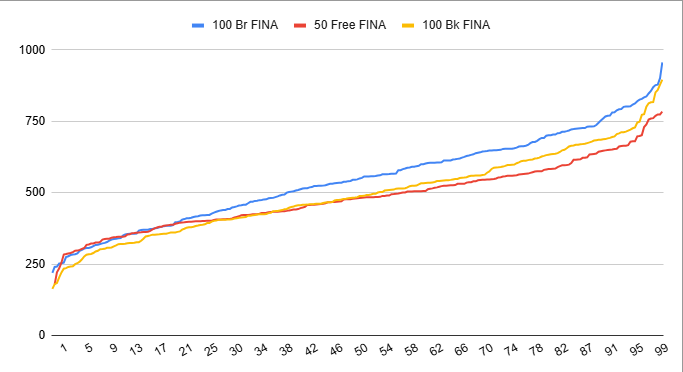

A favor of breaststroke is still visible.

**25th Percentile**
* 100 Backstroke: 59.13 | **FINA**: 394 | **NAIA Rk:** 160th (158th => 395)
* 100 Breaststroke: 1:06.05 | **FINA**: 422 | **NAIA Rk:** 158th

**50th Percentile**
* 100 Backstroke: 55.05 | **FINA**: 488 | **NAIA Rk:** 93rd (86th => 500)
* 100 Breaststroke: 1:00.45 | **FINA**: 550 | **NAIA Rk:** 86th

**75th Percentile**
* 100 Backstrokee: 51.44 | **FINA**: 598 | **NAIA Rk:** 36th (26th => 626)
* 100 Breaststroke: 57.01 | **FINA**: 655 | **NAIA Rk:** 26th

**90th Percentile**
* 100 Backstroke: 49.11 | **FINA**: 688 **NAIA Rk:** 12th (3rd => 746)
* 100 Breaststroke: 54.11 | **FINA**: 766 | **NAIA Rk:** 3rd

**99th Percentile**
* 100 Backstroke: 45.26 | **FINA**: 879 | **NAIA Rk:** 1st
* 100 Breaststroke: 51.28 | **FINA**: 901 | **NAIA Rk:** 2nd

- It is important to remember that even though our additional strata is much closer in size to the 100 breaststroke, our backstroke strata (pre-SRS) was 14% larger than our breaststroke. A slightly higher amount of swimmers (more contested) could very well explain gap in rankings, aside from some variability expected when using a single division as an analogy. Above, you'll notice a secondary placement for each backstroke result. That is how many FINA points the ranking identical to the breaststroke ranking earned in the backstroke event. This demonstrates that the even the distance between ranking does not make up for the significant gap in FINA points.

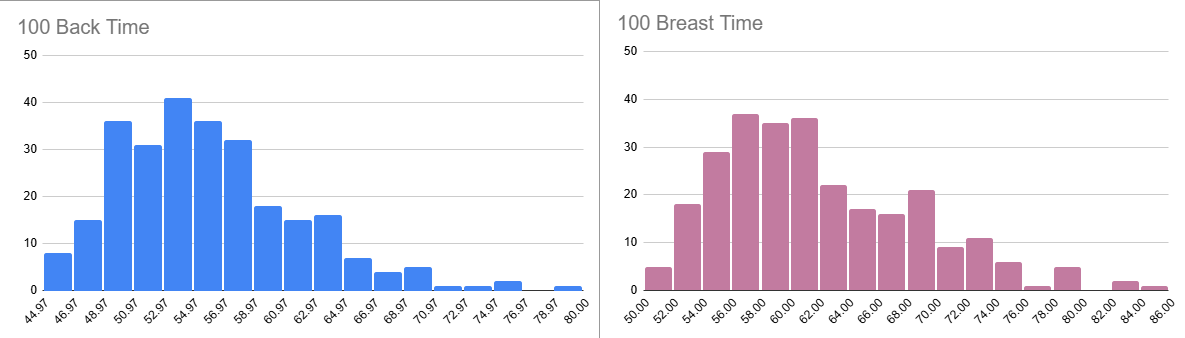



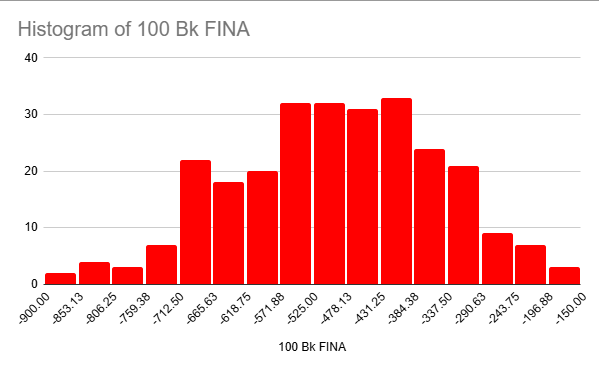

* Can't compare within event
* Can't compare across peers
* Can't compare across events

# Swim Score Analysis: Developing a Comprehensive Scoring System

## I. Introduction

This report details the development of a novel scoring system for competitive swimming. The primary goal was to create a system that accurately reflects a swimmer's performance by considering their percentile rank within an event, while also providing a fair bonus for participation in less-contested events and acknowledging record-breaking achievements.

## II. Problem Statement

Traditional scoring methods often fail to capture the nuanced value of a swim. A key challenge was to design a system that:
1.  Rewards high-percentile performances.
2.  Incentivizes participation in events with fewer competitors.
3.  Provides a clear and consistent bonus for breaking existing records.
4.  Remains simple enough for intuitive understanding and, ideally, manual calculation.

## III. Methodology

The development process was iterative and data-driven, involving continuous refinement based on insights gained from data analysis and user feedback. We explored various mathematical models to represent the relationship between swim times and percentiles, moving from initial logistic and rank-based approaches to a final cubic regression model. Emphasis was placed on balancing statistical accuracy with practical interpretability.

## IV. Data

The analysis utilized data from `All Valuable Data - test.csv.csv`. Key variables included:
*   `Time`: The swim time for a given event.
*   `Percentile`: The pre-calculated percentile rank of a swim within its event.
*   `Event`: The specific swimming event (e.g., "X50.Free.Time", "X100.Br.Time", "X100.Back.Time").

Participation counts were also used:
*   `N_counts`: Number of participants per event (`X50.Free.Time` = 979, `X100.Br.Time` = 496, `X100.Back.Time` = 572).
*   `N_ref`: Reference participant count, set to `N_counts["X50.Free.Time"]` (979).

## V. Model Development: The Cubic Scoring System

The final scoring system is built upon a cubic regression model, offering a balance of fit and interpretability. The score for any given swim is calculated through a series of steps:

### Core Idea
The final score is a combination of a `Base Score` (derived from the swim's percentile) and a `Participation Bonus`, with a special `Record Bonus` applied for new records.

### 1. Percentile Calculation (Cubic Regression)
For each event, a cubic regression model is used to predict the `Percentile` from the `Time`. This model captures the non-linear relationship between time and percentile rank.

The general form of the equation is:
`Percentile = (c3 * Time³) + (c2 * Time²) + (c1 * Time) + c0`

The specific coefficients for each event are:

*   **50 Yard Freestyle**
    `Percentile = (0.1521 * Time³) + (-10.0126 * Time²) + (202.1246 * Time) + -1160.6027`

*   **100 Yard Breaststroke**
    `Percentile = (0.0027 * Time³) + (-0.3962 * Time²) + (12.6291 * Time) + 133.9928`

*   **100 Yard Backstroke**
    `Percentile = (0.0038 * Time³) + (-0.5337 * Time²) + (18.9132 * Time) + 1.1849`

*(Note: Percentiles are clipped to a range of 0 to 100 to ensure valid values for subsequent calculations.)*

### 2. Base Score
The `Base Score` is a direct scaling of the calculated `Percentile`:
`Base Score = Percentile * 10`

### 3. Dynamic `k` Value (for Participation Bonus)
The `k` value scales the `Participation Bonus` and dynamically changes based on the `Percentile`. This ensures the bonus diminishes as a swimmer approaches the highest percentiles.

`k = -2 * Percentile + 200`

*   At 0th Percentile: `k = 200`
*   At 50th Percentile: `k = 100`
*   At 100th Percentile: `k = 0`

### 4. Participation Bonus
The `Participation Bonus` rewards swimmers in events with fewer participants, reflecting the idea that placing high in a less-contested event can be more valuable.

`Participation Bonus = k * log(Participation Ratio)`

Where:
*   `Participation Ratio = N_ref / N_event`
*   `N_ref` (Reference Event Count, 50 Free): 979
*   `N_event` (Current Event Count):
    *   50 Free: 979
    *   100 Breast: 496
    *   100 Back: 572

### 5. Record-Breaking Bonus

A special bonus is applied for swims that are faster than the current fastest time in the database for that event.

`Record Bonus = ((Time / Fastest Time in Database) - 1) * 100`

This `Record Bonus` is added to the score that the `Fastest Time in Database` would have received.

### 6. Final Score

The `Final Score` is determined based on whether the swim is a new record:

*   **If `Time < Fastest Time in Database` (New Record):**
    `Final Score = (Score of Fastest Time in Database) + Record Bonus`
    *(The "Score of Fastest Time in Database" is calculated using steps 1-4 for that specific fastest time.)*

*   **Otherwise (Standard Swim):**
    `Final Score = Base Score + Participation Bonus`

## VI. Results and Discussion

The cubic model, combined with the dynamic `k` value and the record-breaking bonus, has proven to be a robust and insightful scoring system.

(Cubic Regression Model Plot Here)

A key finding from this development is that the cubic model drastically improves the mean difference between events, particularly at higher percentiles. This means that the system effectively rewards swimmers for achieving high percentile ranks, while simultaneously acknowledging that a lower-percentile breaststroker (due to the participation bonus) may indeed be a more valuable swimmer in terms of their potential to place higher in meets.

(50 Free Score Histogram Here)
(100 Breast Score Histogram Here)
(100 Back Score Histogram Here)

## VII. Conclusion

The developed scoring system successfully balances performance metrics with strategic considerations like event participation and record-breaking. The cubic regression model provides a mathematically sound yet interpretable framework for evaluating swimmer performance, offering a nuanced and fair assessment that aligns with the stated goals of the project.
